In [36]:
%matplotlib inline 

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

In [38]:
teams = pd.read_csv('./baseballdatabank-master/core/Teams.csv')

In [39]:
#teams = teams[teams['yearID'] >= 2011]
teams = teams[['yearID', 'teamID', 'Rank', 'R', 'RA', 'G', 'W', 'H', 'BB', 'HBP', 'AB', 'SF', 'HR', '2B', '3B']]

In [40]:
#teams = teams.set_index(['yearID', 'teamID'])

In [41]:
#teams['W'][2011, 'SLN']


In [42]:
print(teams)

      yearID teamID  Rank    R   RA    G    W     H     BB   HBP    AB    SF  \
0       1871    BS1     3  401  303   31   20   426   60.0   NaN  1372   NaN   
1       1871    CH1     2  302  241   28   19   323   60.0   NaN  1196   NaN   
2       1871    CL1     8  249  341   29   10   328   26.0   NaN  1186   NaN   
3       1871    FW1     7  137  243   19    7   178   33.0   NaN   746   NaN   
4       1871    NY2     5  302  313   33   16   403   33.0   NaN  1404   NaN   
5       1871    PH1     1  376  266   28   21   410   46.0   NaN  1281   NaN   
6       1871    RC1     9  231  287   25    4   274   38.0   NaN  1036   NaN   
7       1871    TRO     6  351  362   29   13   384   49.0   NaN  1248   NaN   
8       1871    WS3     4  310  303   32   15   375   48.0   NaN  1353   NaN   
9       1872    BL1     2  617  434   58   35   753   29.0   NaN  2571   NaN   
10      1872    BR1     9  152  413   29    3   248   18.0   NaN  1072   NaN   
11      1872    BR2     6  237  473   37

Text(0.5,1,'Distribution of Wins')

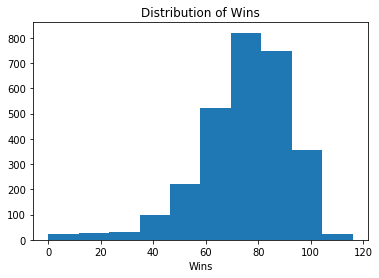

In [45]:
plt.hist(teams['W'])
plt.xlabel('Wins')
plt.title('Distribution of Wins')

Text(0,0.5,'Wins')

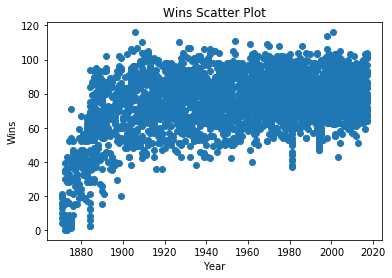

In [47]:
plt.scatter(teams['yearID'], teams['W'], s=None, c=None)
plt.title('Wins Scatter Plot')
plt.xlabel('Year')
plt.ylabel('Wins')


In [52]:
# Create runs per year and games per year dictionaries
runs_per_year = {}
games_per_year = {}

for i, row in teams.iterrows():
    year = row['yearID']
    runs = row['R']
    games = row['G']
    if year in runs_per_year:
        runs_per_year[year] = runs_per_year[year] + runs
        games_per_year[year] = games_per_year[year] + games
    else:
        runs_per_year[year] = runs
        games_per_year[year] = games
        


In [50]:
# Create MLB runs per game (per year) dictionary
mlb_runs_per_game = {}
for k, v in games_per_year.items():
    year = k
    games = v
    runs = runs_per_year[year]
    mlb_runs_per_game[year] = runs / games

Text(0,0.5,'MLB Runs per Game')

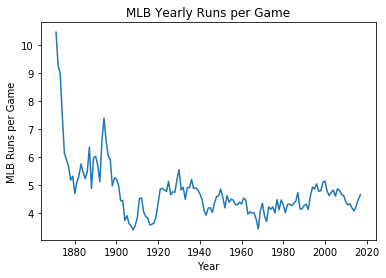

In [51]:
# Create lists from mlb_runs_per_game dictionary
lists = sorted(mlb_runs_per_game.items())
x, y = zip(*lists)

# Create line plot of Year vs. MLB runs per Game
plt.plot(x, y)
plt.title('MLB Yearly Runs per Game')
plt.xlabel('Year')
plt.ylabel('MLB Runs per Game')
